# Visualizing Attention as heatmap

Ramin Anushiravani \
09/14/2024 

This notebook visualizes self-attention weights for language translation from English to Farsi. 



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Row-wise sums of attention weights (should be 1):
tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])


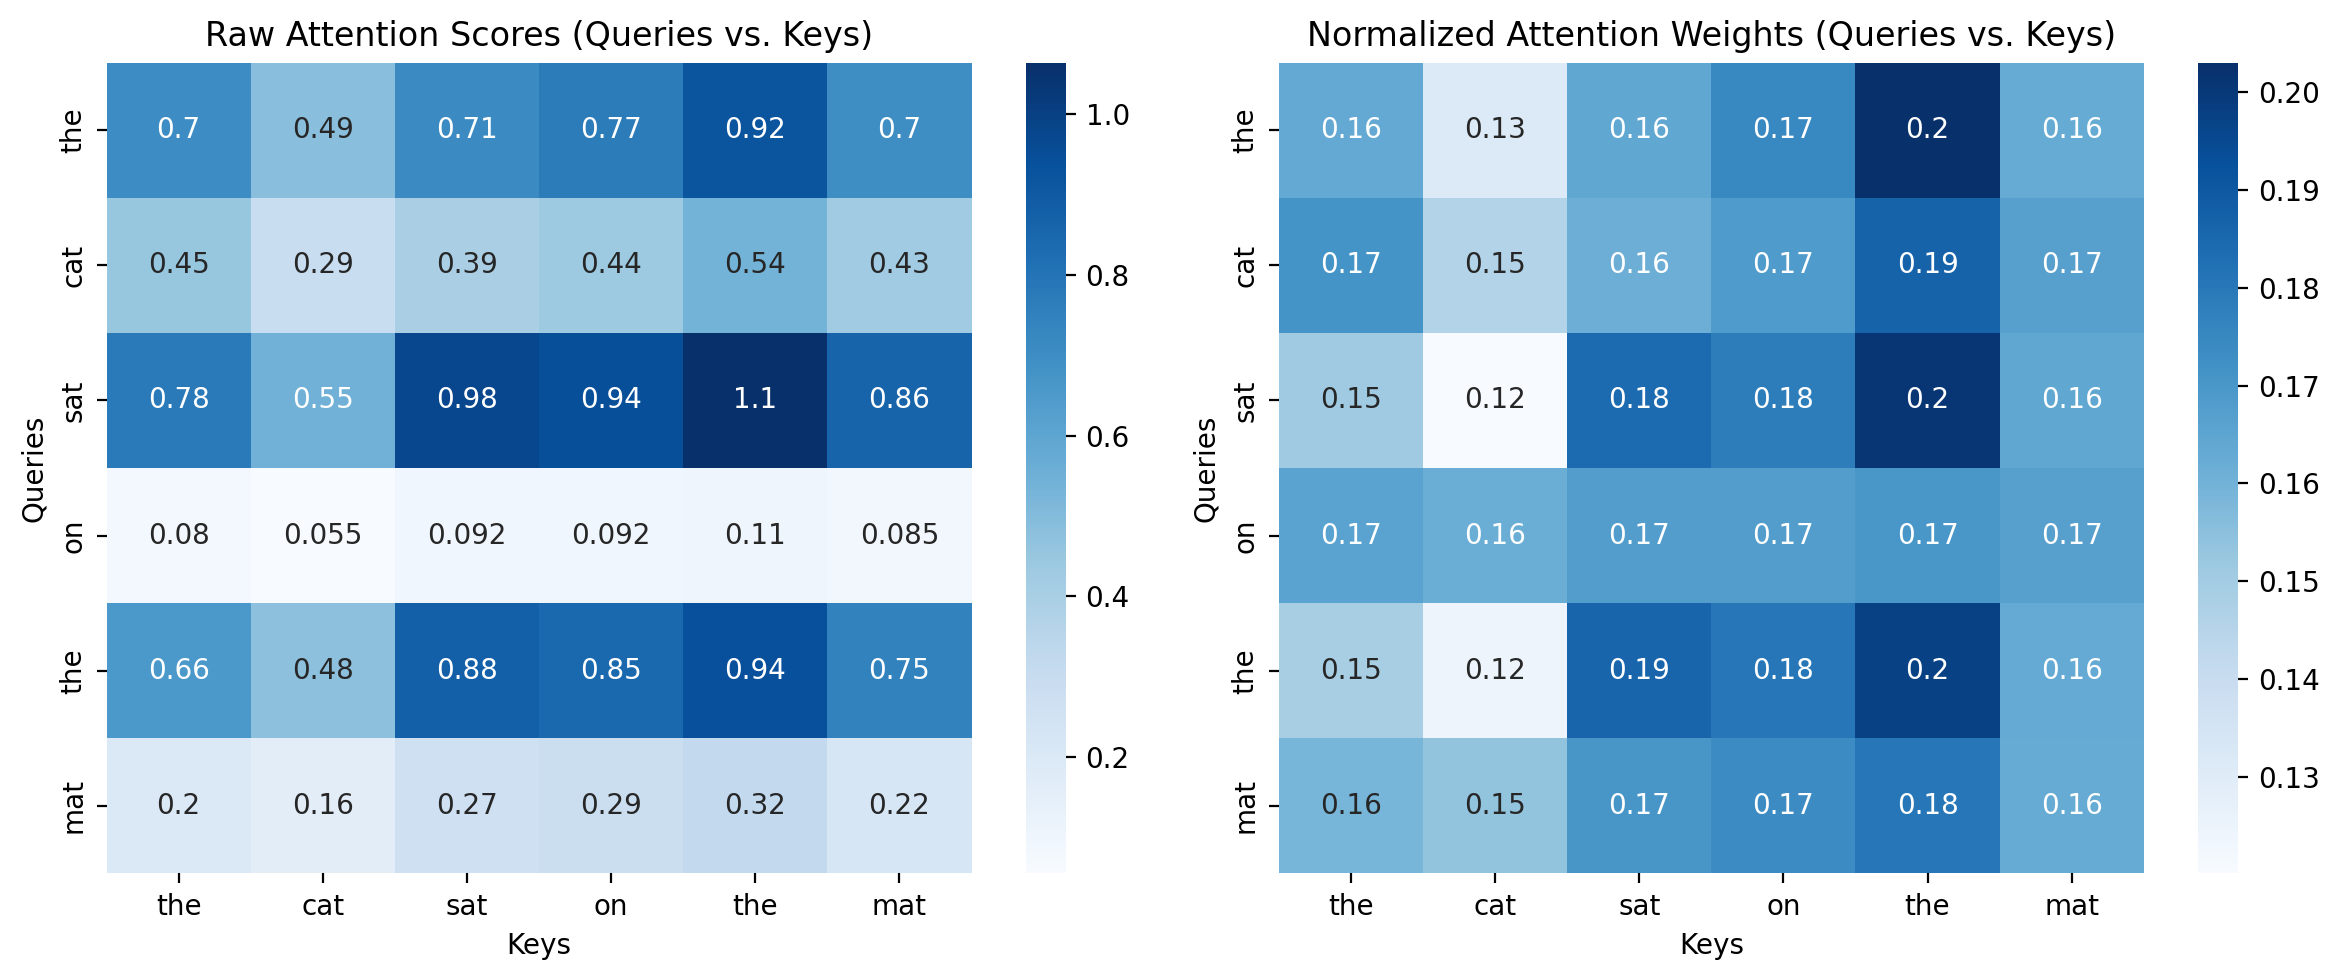

Queries shape: torch.Size([1, 6, 3]) (N, Q, D)
Keys shape: torch.Size([1, 6, 3]) (N, K, D)
Raw attention scores shape: torch.Size([1, 6, 6]) (N, Q, K)
Attention weights shape: torch.Size([1, 6, 6]) (N, Q, K)


In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the sentence and corresponding tokens
sentence = ["the", "cat", "sat", "on", "the", "mat"]
N = 1  # Batch size
Q = len(sentence)  # Number of queries (sequence length of the sentence)
K = Q  # Number of keys (sequence length is the same as the number of queries)
D = 3  # Dimension of each query/key

# Initialize random queries and keys (self-attention: queries and keys are the same)
queries = torch.rand(N, Q, D)  # Shape: (N, Q, D)
keys = torch.rand(N, K, D)     # Shape: (N, K, D)

# Step 2: Calculate raw attention scores (dot product between queries and keys)
raw_attention_scores = torch.matmul(queries, keys.transpose(-2, -1))  # Shape: (N, Q, K)

# Step 3: Apply softmax along the key axis (row-wise normalization)
attention_weights = F.softmax(raw_attention_scores, dim=-1)  # Shape: (N, Q, K)

# Step 4: Check if each row of the attention weights sums to 1
row_sums = attention_weights.sum(dim=-1)  # Sum across the key axis (columns)
print("Row-wise sums of attention weights (should be 1):")
print(row_sums)

# Step 5: Visualize the raw attention scores and normalized attention weights with annotations
plt.figure(figsize=(12, 5), dpi = 200)

# Raw attention scores (before softmax)
plt.subplot(1, 2, 1)
sns.heatmap(raw_attention_scores[0].detach().numpy(), annot=True, cmap="Blues", cbar=True,
            xticklabels=sentence, yticklabels=sentence)
plt.title("Raw Attention Scores (Queries vs. Keys)")
plt.xlabel("Keys")
plt.ylabel("Queries")

# Normalized attention weights (after softmax)
plt.subplot(1, 2, 2)
sns.heatmap(attention_weights[0].detach().numpy(), annot=True, cmap="Blues", cbar=True,
            xticklabels=sentence, yticklabels=sentence)
plt.title("Normalized Attention Weights (Queries vs. Keys)")
plt.xlabel("Keys")
plt.ylabel("Queries")

plt.tight_layout()
plt.show()

# Step 6: Explanation of dimensions
print(f"Queries shape: {queries.shape} (N, Q, D)")
print(f"Keys shape: {keys.shape} (N, K, D)")
print(f"Raw attention scores shape: {raw_attention_scores.shape} (N, Q, K)")
print(f"Attention weights shape: {attention_weights.shape} (N, Q, K)")


Row-wise sums of attention weights (should be 1):
tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])


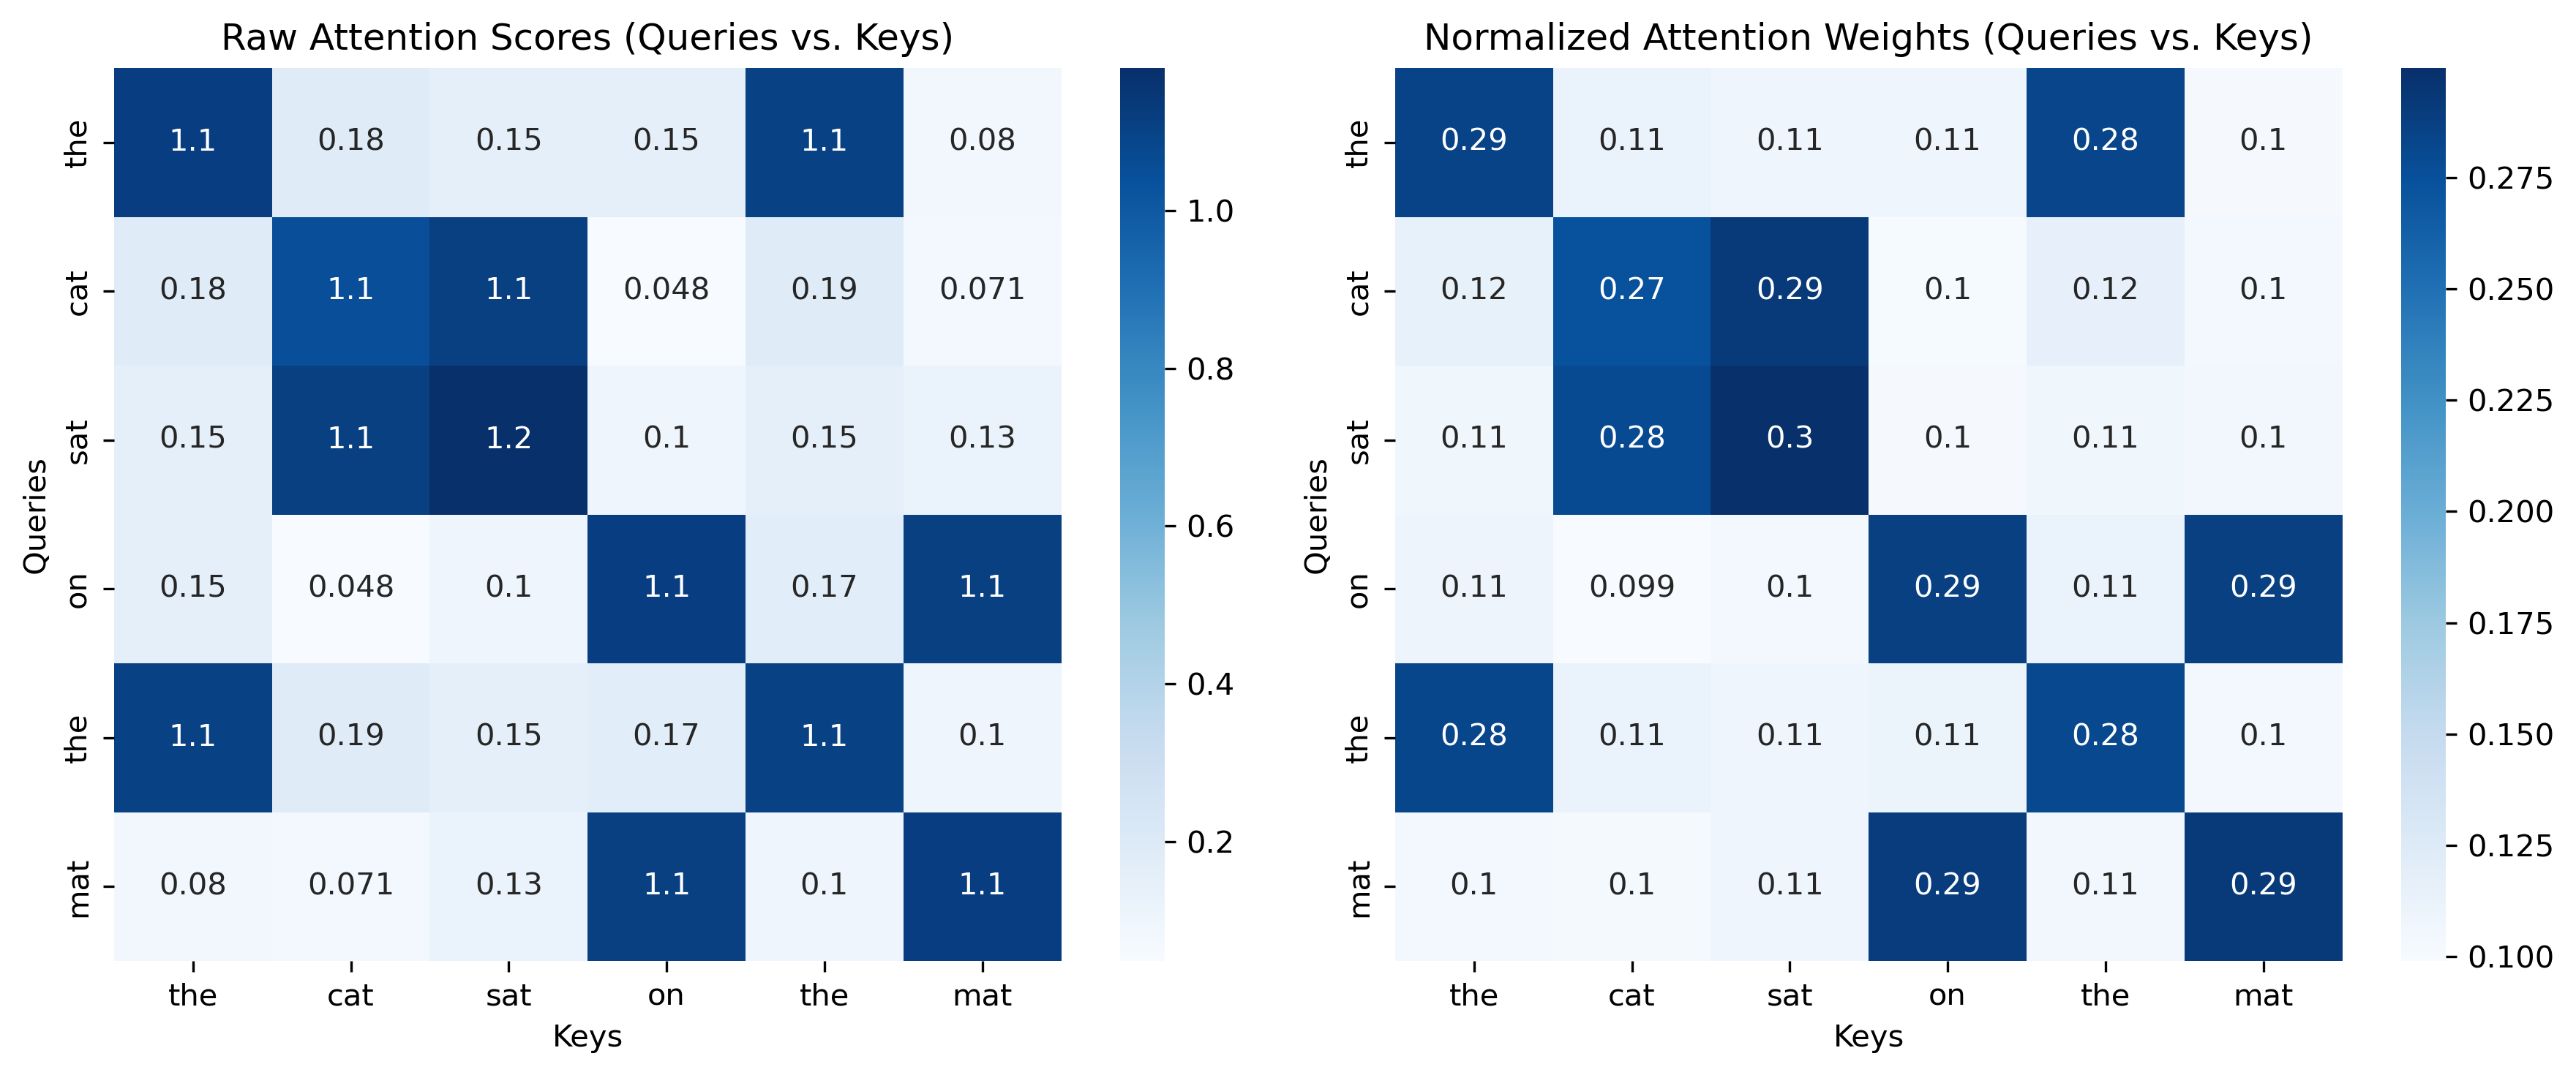

Queries shape: torch.Size([1, 6, 3]) (N, Q, D)
Keys shape: torch.Size([1, 6, 3]) (N, K, D)
Raw attention scores shape: torch.Size([1, 6, 6]) (N, Q, K)
Attention weights shape: torch.Size([1, 6, 6]) (N, Q, K)


In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the sentence and corresponding tokens
sentence = ["the", "cat", "sat", "on", "the", "mat"]
N = 1  # Batch size
Q = len(sentence)  # Number of queries (sequence length of the sentence)
K = Q  # Number of keys (same as number of queries)
D = 3  # Dimension of each query/key

# Step 2: Manually set queries and keys with slight randomness to induce more variability
base_queries = torch.tensor([[[1, 0, 0],   # "the"
                              [0, 1, 0],   # "cat"
                              [0, 1, 0],   # "sat"
                              [0, 0, 1],   # "on"
                              [1, 0, 0],   # "the"
                              [0, 0, 1]]], # "mat"
                            dtype=torch.float32)  # Shape: (N, Q, D)

base_keys = torch.tensor([[[1, 0, 0],   # "the"
                           [0, 1, 0],   # "cat"
                           [0, 1, 0],   # "sat"
                           [0, 0, 1],   # "on"
                           [1, 0, 0],   # "the"
                           [0, 0, 1]]], # "mat"
                         dtype=torch.float32)  # Shape: (N, K, D)

# Adding slight randomness
random_noise = 0.1 * torch.rand(N, Q, D)  # Random noise scaled by 0.1
queries = base_queries + random_noise  # Randomize queries slightly
keys = base_keys + random_noise  # Randomize keys slightly

# Step 3: Calculate raw attention scores (dot product between queries and keys)
raw_attention_scores = torch.matmul(queries, keys.transpose(-2, -1))  # Shape: (N, Q, K)

# Step 4: Apply softmax along the key axis (row-wise normalization)
attention_weights = F.softmax(raw_attention_scores, dim=-1)  # Shape: (N, Q, K)

# Step 5: Check if each row of the attention weights sums to 1
row_sums = attention_weights.sum(dim=-1)
print("Row-wise sums of attention weights (should be 1):")
print(row_sums)

# Step 6: Visualize the raw attention scores and normalized attention weights with annotations
plt.figure(figsize=(12, 5), dpi = 300)

# Raw attention scores (before softmax)
plt.subplot(1, 2, 1)
sns.heatmap(raw_attention_scores[0].detach().numpy(), annot=True, cmap="Blues", cbar=True,
            xticklabels=sentence, yticklabels=sentence)
plt.title("Raw Attention Scores (Queries vs. Keys)")
plt.xlabel("Keys")
plt.ylabel("Queries")

# Normalized attention weights (after softmax)
plt.subplot(1, 2, 2)
sns.heatmap(attention_weights[0].detach().numpy(), annot=True, cmap="Blues", cbar=True,
            xticklabels=sentence, yticklabels=sentence)
plt.title("Normalized Attention Weights (Queries vs. Keys)")
plt.xlabel("Keys")
plt.ylabel("Queries")

plt.tight_layout()
plt.show()

# Step 7: Explanation of dimensions
print(f"Queries shape: {queries.shape} (N, Q, D)")
print(f"Keys shape: {keys.shape} (N, K, D)")
print(f"Raw attention scores shape: {raw_attention_scores.shape} (N, Q, K)")
print(f"Attention weights shape: {attention_weights.shape} (N, Q, K)")
